In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from utils import *
from algo import *


num_nodes: 200


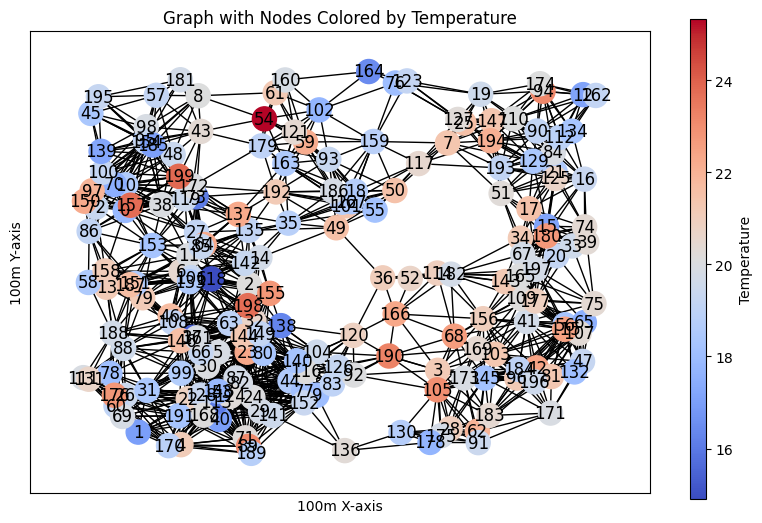

In [2]:
import networkx as nx
import networkx as nx
#intialise variables
required_probability=0.9999
num_nodes, G,A,pos,r_c=build_random_graph(200,required_probability,fix_num_nodes=True)
print("num_nodes:",num_nodes)

mean_temp=22
var_temp=5

#now to generate measured values for the temperature sensors ins some flat 3d field
temperature=generate_temp_field(num_nodes,3,20)
tolerance=10**-12
c=0.4
import matplotlib.pyplot as plt
# Set node colors based on temperatures

cmap = plt.cm.coolwarm

# Normalize temperature values to range [0, 1] for colormap
norm = plt.Normalize(vmin=np.min(temperature), vmax=np.max(temperature))

# Map temperature values to colors
node_colors = [cmap(norm(temp)) for temp in temperature]

# Plot the graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, pos=pos, node_color=node_colors, edge_color='black', with_labels=True)

# Create a color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []  # empty array for the data range

# Set plot title and labels
plt.title('Graph with Nodes Colored by Temperature')
plt.xlabel('100m X-axis')
plt.ylabel('100m Y-axis')

# Add color bar to the plot
cbar_ax = plt.axes([0.95, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Temperature')

# Show the plot
plt.show()

Started PDMM node change algorithm num_nodes  200
num_nodes  101
Started RG node change algorithm num_nodes  200
Finished algorithm num_nodes  101


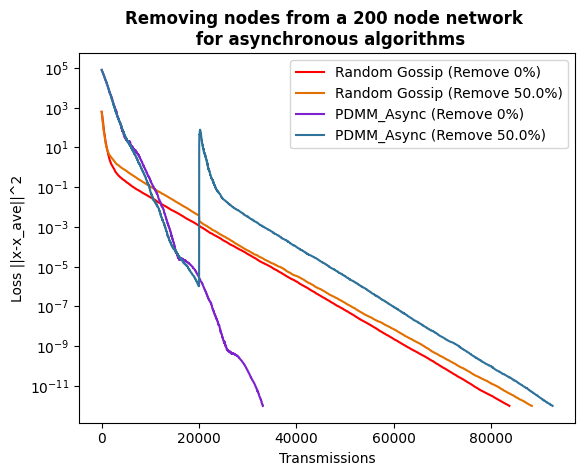

In [16]:
percentage_change=0.5
#removing of nodes  PDMM async
loss_pdmm_async,trans_pdmm_async=PDMM_async(temperature.copy(),G.copy(),tolerance,c)
loss_pdmm_async_node,trans_pdmm_async_node=PDMM_async_node_change(temperature.copy(),G.copy(),pos.copy(),25,10,r_c,tolerance,c,"remove_bulk",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)


loss_random,temperature_rand=random_gossip(temperature.copy(),A.copy(),tolerance)
loss_random_add,temperature_rand_add=random_gossip_node_change(temperature.copy(),G.copy(),pos.copy(),25,10,r_c,tolerance,"remove_bulk",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)
plot_log_convergence([loss_random,loss_random_add,loss_pdmm_async,loss_pdmm_async_node],[np.arange(1,loss_random.shape[0]+1),np.arange(1,loss_random_add.shape[0]+1),trans_pdmm_async,trans_pdmm_async_node],['Random Gossip (Remove 0%)',f'Random Gossip (Remove {percentage_change*100}%)','PDMM_Async (Remove 0%) ',f"PDMM_Async (Remove {percentage_change*100}%)"],f"Removing nodes from a {num_nodes} node network \n for asynchronous algorithms",["#ff0000", "#e17000","#7e22ce","#2f739a"])


Started PDMM node change algorithm num_nodes  200
num_nodes  299
Started RG node change algorithm num_nodes  200
Finished algorithm num_nodes  299


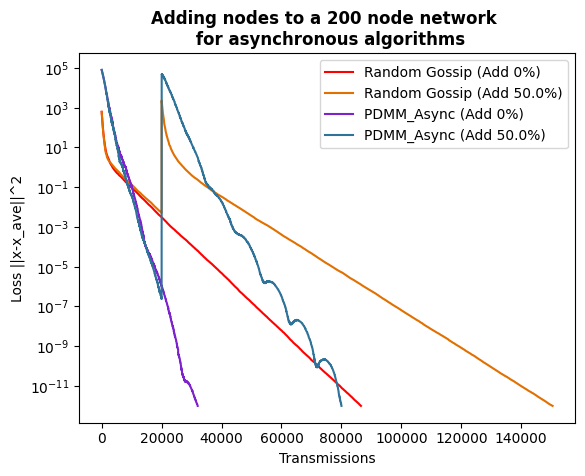

In [17]:
percentage_change=0.5
#Adding of nodes  PDMM async
loss_pdmm_async,trans_pdmm_async=PDMM_async(temperature.copy(),G.copy(),tolerance,c)
loss_pdmm_async_node,trans_pdmm_async_node=PDMM_async_node_change(temperature.copy(),G.copy(),pos.copy(),25,10,r_c,tolerance,c,"add_bulk",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)


loss_random,temperature_rand=random_gossip(temperature.copy(),A.copy(),tolerance)
loss_random_add,temperature_rand_add=random_gossip_node_change(temperature.copy(),G.copy(),pos.copy(),25,10,r_c,tolerance,"add_bulk",averaging_method="update",max_iter=1000000,node_change_p=percentage_change)
plot_log_convergence([loss_random,loss_random_add,loss_pdmm_async,loss_pdmm_async_node],[np.arange(1,loss_random.shape[0]+1),np.arange(1,loss_random_add.shape[0]+1),trans_pdmm_async,trans_pdmm_async_node],['Random Gossip (Add 0%)',f'Random Gossip (Add {percentage_change*100}%)','PDMM_Async (Add 0%) ',f"PDMM_Async (Add {percentage_change*100}%)"],f"Adding nodes to a {num_nodes} node network \n for asynchronous algorithms",["#ff0000", "#e17000","#7e22ce","#2f739a"])


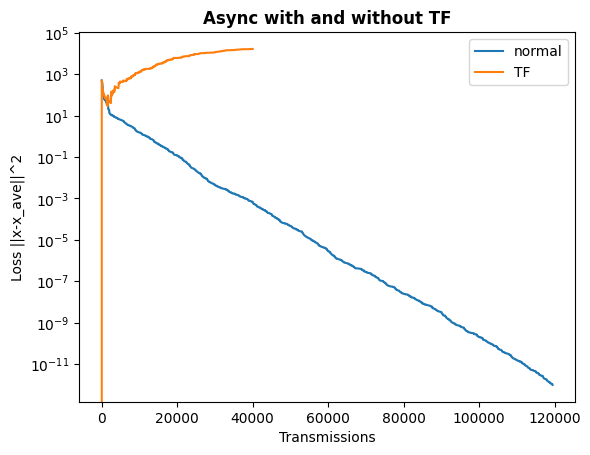

In [4]:
loss_async,trans_async,temperature_async=async_distr_averaging(temperature.copy(),A.copy(),tolerance)
loss_async_tf,trans_async_tf,temperature_async_tf=async_distr_averaging_TF(temperature.copy(),A.copy(),tolerance,0.1)
plot_log_convergence([loss_async,loss_async_tf[1:]],[trans_async,trans_async_tf[1:]],["normal","TF"],"Async with and without TF")


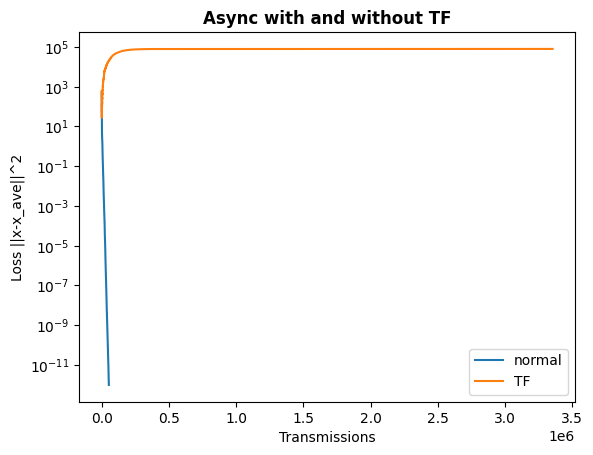

In [8]:
plot_log_convergence([loss_async,loss_async_tf],[trans_async,trans_async_tf],["normal","TF"],"Async with and without TF")


nodes: 300
radius: 0.157
nodes: 250
radius: 0.157
nodes: 200
radius: 0.157


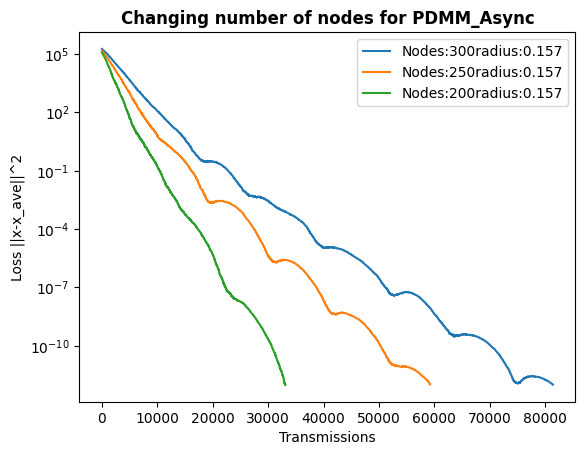

In [18]:
num_nodes_Arr=[300,250,200]
rad_Arr=[0.157,0.157,0.157]
num_nodes_Arr_Str=["Nodes:" +str(node)+"radius:"+str(rad_Arr[i]) for i,node in enumerate(num_nodes_Arr)]
tolerance=10**-12
c=0.4
loss_Arr=[]
trans_arr=[]
for i,nodes in enumerate(num_nodes_Arr):
    print("nodes:",nodes)
    num_nodes, G,A,pos,r_c=build_random_graph(nodes,required_probability,fix_num_nodes=True,r_fix=rad_Arr[i])
    print("radius:",r_c)
    temperature=generate_temp_field(num_nodes,10,25)
    loss_pdmm_async,trans_pdmm_async=PDMM_async(temperature.copy(),G.copy(),tolerance,c)
    loss_Arr.append(loss_pdmm_async)
    trans_arr.append(trans_pdmm_async)
plot_log_convergence(loss_Arr,trans_arr,num_nodes_Arr_Str,"Changing number of nodes for PDMM_Async")
